In [3]:
#Agglomerative clustering
#read the data
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/devesh1093/Hackveda-Casualty-Severity-/main/Accident_Dataset_prepared.csv")


In [4]:
data.drop("1st Road Class",axis=1,inplace=True)
data.head(3)

,Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Casualty Victim,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,5,3,1,4,1,1,1,36,6
1,5,3,1,4,2,1,1,27,6
2,1,2,2,1,3,2,1,68,4


In [5]:
#Perform clustering on variables
from sklearn.cluster import AgglomerativeClustering
ag_cluster= AgglomerativeClustering(n_clusters=3)

#Train the algorithm = Calculate attributeson the basis of dataset
ag_cluster.fit(data)

AgglomerativeClustering(n_clusters=3)

In [6]:
#After training the model, we got following attributes
print("The number of clusters found",ag_cluster.n_clusters_)
print("The cluster labels",ag_cluster.labels_)
print("The leaves", ag_cluster.n_leaves_)
print("The connected components",ag_cluster.n_connected_components_)
print("The children",ag_cluster.children_)


The number of clusters found 3
The cluster labels [1 0 2 ... 0 2 1]
The leaves 2664
The connected components 1
The children [[ 385 2340]
 [ 822 1502]
 [ 167 2353]
 ...
 [5319 5322]
 [5321 5323]
 [5324 5325]]


In [7]:
#Predict the cluster using agglomerative clustering
data["Cluster Labels"]=ag_cluster.fit_predict(data)

#Print the cluster column alongwith casualty severity
data[["Casualty Severity", "Cluster Labels"]]


,Casualty Severity,Cluster Labels
0,1,1
1,1,0
2,2,2
3,1,1
4,1,0
...,...,...
2659,1,0
2660,1,0
2661,1,0
2662,1,2


In [8]:
#Classify casualty severity using LassoLars equation
#Select the Independent and Dependent Variables
Y= data["Casualty Severity"]#dependent
independent_variables=data.columns
independent_variables= independent_variables.delete(5)
X=data[independent_variables]#training data

In [9]:
#Train the model
from sklearn.linear_model import LassoLars
lr = LassoLars(alpha=0.01,max_iter=100)
lr.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoLars(alpha=0.01, max_iter=100)

In [14]:
#Predict using LassoLars regression model
data["Predicted Casualty Severity LassoLARS"]=lr.predict(X)
data[["Road Surface","Weather Conditions","Casualty Severity","Predicted Casualty Severity"]]

,Road Surface,Weather Conditions,Casualty Severity,Predicted Casualty Severity
0,3,4,1,1.132883
1,3,4,1,1.132883
2,2,1,2,1.132883
3,1,1,1,1.132883
4,2,1,1,1.132883
...,...,...,...,...
2659,2,2,1,1.132883
2660,1,1,1,1.132883
2661,1,1,1,1.132883
2662,1,1,1,1.132883


In [15]:
print("Alphas",lr.alphas_)
print("Coefficients",lr.coef_)
print("Intercept",lr.intercept_)

Alphas [0.01]
Coefficients [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Intercept 1.132882882882883


In [16]:
 #GradientBoostingClassifier

In [38]:
data.columns
Y

0       1
1       1
2       2
3       1
4       1
       ..
2659    1
2660    1
2661    1
2662    1
2663    1
Name: Casualty Severity, Length: 2664, dtype: int64

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(
                    random_state = 1337,
                    verbose = 0,
                    n_estimators = 100,
                    learning_rate = 0.1,
                    loss = 'deviance',
                    max_depth = 3
                   )
GBC.fit(X,Y)
data["Predicted Casualty Severity GBC" ]=GBC.predict(X)

In [42]:
data[["Casualty Severity","Predicted Casualty Severity LassoLARS", "Predicted Casualty Severity GBC"]].head(20)

,Casualty Severity,Predicted Casualty Severity LassoLARS,Predicted Casualty Severity GBC
0,1,1.132883,1
1,1,1.132883,1
2,2,1.132883,1
3,1,1.132883,1
4,1,1.132883,1
5,1,1.132883,1
6,1,1.132883,1
7,1,1.132883,1
8,1,1.132883,1
9,1,1.132883,1


Text(0.5, 1.0, 'Casualty Severity Prediction')

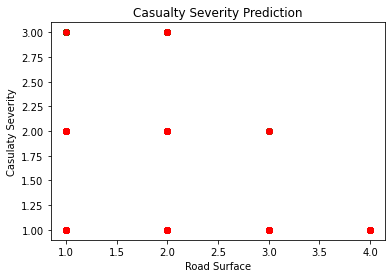

In [47]:
import matplotlib.pyplot as plt
plt.scatter(data["Road Surface"],data["Casualty Severity"],color="green")
plt.scatter(data["Road Surface"],data["Predicted Casualty Severity GBC"],color="red")
plt.xlabel("Road Surface")
plt.ylabel("Casulaty Severity")
plt.title("Casualty Severity Prediction")